In [2]:
from Scripts import ScriptOptions 
import os

params= ScriptOptions(
    ImageFolder= r"C:\Users\liali\YoloWdTagger\wdv3-timm\Tests\NoDetection",
    model='big', #Ещё есть convnext, swinv2, big, vit
    gen_threshold=0.25, #увереность для общей картинки/и если не установлено значение в конфиге yolo моделей то для них тоже
    char_threshold=0.75, # Увереность для персонажей, теги персонажей берутся только из полной области, по причине я так захотел
    batch=2,
    recursive=False,
    save_txt=True,
    append_txt=True,
    add_tags_before="",
    add_tags_after="",
    remove_tags="",
    detectors_config="detectors-Copy1.json"
)



In [3]:
from Scripts import BatchTagging
result = BatchTagging(params)

Файл config.json уже существует в models\taggers\wd-eva02-large-tagger-v3
Файл selected_tags.csv уже существует в models\taggers\wd-eva02-large-tagger-v3
Загрузка модели тегирования 'big' из 'SmilingWolf/wd-eva02-large-tagger-v3'...
Loading model from models\taggers\wd-eva02-large-tagger-v3\model.safetensors using safetensors
Загрузка списка тегов...
Загрузка тегов из локального файла: models\taggers\wd-eva02-large-tagger-v3\selected_tags.csv
Создание трансформации данных...
Загрузка конфигурации детекторов из detectors-Copy1.json...
Загрузка модели YOLO person_yolov8s-seg.pt...
Loading YOLO model from local directory: models\yolo\person_yolov8s-seg.pt
Загрузка модели YOLO face_yolov9c.pt...
Loading YOLO model from local directory: models\yolo\face_yolov9c.pt
Всего изображений для обработки: 40

Обработка изображения 1/40: C:\Users\liali\YoloWdTagger\wdv3-timm\Tests\NoDetection\132060.jpg

image 1/1 C:\Users\liali\YoloWdTagger\wdv3-timm\Tests\NoDetection\132060.jpg: 352x640 (no detecti

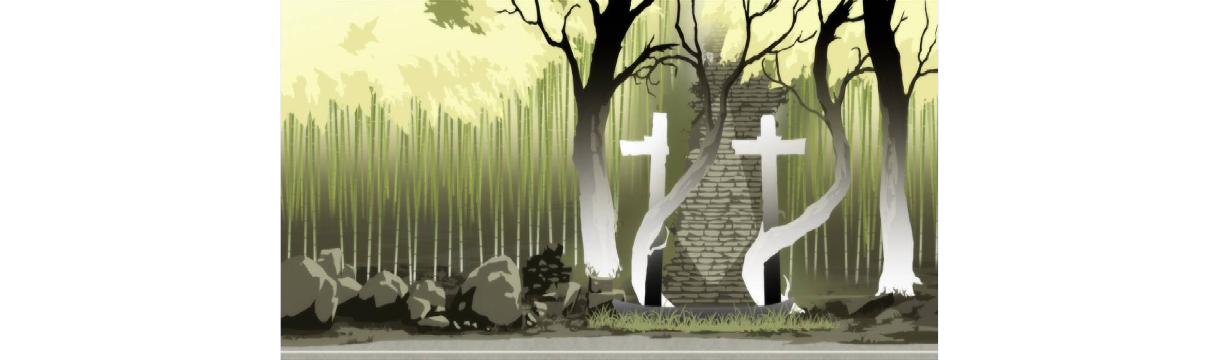

Информация о изображении #1: C:\Users\liali\YoloWdTagger\wdv3-timm\Tests\NoDetection\132060.jpg

Объединенные теги:
bare tree, cross, day, fence, forest, grass, grave, graveyard, nature, no humans, outdoors, rock, ruins, scenery, stairs, statue, tombstone, tree

Теги без включения yolo моделей:
no humans, tree, scenery, tombstone, grave, outdoors, cross, nature, graveyard, rock, bare tree, forest, stairs, grass, day, fence, ruins, statue

Разница тегов (присутствуют в объединенных, но отсутствуют в тегах без yolo):



In [6]:
from Scripts import view_image_results
view_image_results(result, 0, visualize=True, save_visualization=False, verbose=True)

In [5]:
from pathlib import Path
from Scripts.tag_manager import TagManager

manager = TagManager()

manager.load_from_folder("D:\other_datasets\selective_colorization", recursive=True)  # recursive=True для поиска в подпапках


# Remove redundant subtags
removed_tags = manager.remove_redundant_subtags()
    
# Save changes if any tags were removed
if removed_tags > 0:
    manager.save_changes()
    
print("Обработка завершена!")

<>:6: SyntaxWarning:

invalid escape sequence '\o'

<>:6: SyntaxWarning:

invalid escape sequence '\o'

C:\Users\liali\AppData\Local\Temp\ipykernel_12876\4246392247.py:6: SyntaxWarning:

invalid escape sequence '\o'



Загружено 85 файлов с тегами
В файле D:\other_datasets\selective_colorization\Araragi.Koyomi.full.975353.txt найдены избыточные теги: ['glowing', 'jacket', 'moon', 'night', 'pants', 'school uniform', 'sky', 'toned', 'tree']
В файле D:\other_datasets\selective_colorization\Gaen.Izuko.full.1587950.txt найдены избыточные теги: ['gloves', 'headphones']
В файле D:\other_datasets\selective_colorization\Kiss-shot.Acerola-orion.Heart-under-blade.full.1016973.txt найдены избыточные теги: ['long hair', 'blood', 'breasts', 'gloves', 'ribbon', 'tongue']
В файле D:\other_datasets\selective_colorization\Kiss-shot.Acerola-orion.Heart-under-blade.full.1961079.txt найдены избыточные теги: ['legs', 'tree']
В файле D:\other_datasets\selective_colorization\Monogatari.full.84714.txt найдены избыточные теги: ['school uniform', 'shirt']
В файле D:\other_datasets\selective_colorization\Monogatari.full.946450.txt найдены избыточные теги: ['breasts', 'hair ornament', 'shorts']
В файле D:\other_datasets\selectiv

In [ ]:
# Add tags to the beginning and end
count = manager.add_tags(
    add_tags_before="high quality, best quality", 
    add_tags_after="digital art"
)
print(f"Добавлены теги в {count} файлов")
manager.save_changes()

# Remove unwanted tags
count = manager.remove_tags("low quality, worst quality")
print(f"Удалены теги из {count} файлов")
manager.save_changes()

# Replace tags
count = manager.replace_tag("1girl", "woman")
print(f"Заменены теги в {count} файлов")
manager.save_changes()

# Sort tags with important ones first
important_tags = ["masterpiece", "high quality", "best quality", "ultra detailed"]
count = manager.sort_tags(alphabetical=True, importance=important_tags)
print(f"Отсортированы теги в {count} файлов с приоритетом важных тегов")
manager.save_changes()

# Find files with specific tags
files = manager.find_files_with_tag("portrait")
print(f"Найдено {len(files)} файлов с тегом 'portrait'")

# Process only these files
if files:
    count = manager.add_tags(add_tags_after="close-up", files=files)
    print(f"Добавлен тег 'close-up' к {count} портретам")
    manager.save_changes(files=files)

In [26]:
from Scripts.model import ensure_model_folder, download_model_files, load_model_local_or_remote, load_labels_local_or_remote, load_yolo_model
from pathlib import Path
from timm.data import create_transform, resolve_data_config

repo_id = r"SmilingWolf/wd-vit-tagger-v3"#MODEL_REPO_MAP[opts.model]
#image_folder = Path(opts.ImageFolder).resolve()
#if not image_folder.is_dir():
#    raise FileNotFoundError(f"Директория не найдена: {image_folder}")

# Создаем папку для моделей тегирования, если она не существует
#model_folder = ensure_model_folder(Path(opts.model_folder))

# Создаем папку для моделей YOLO, если она не существует
#yolo_model_dir = ensure_model_folder(Path(opts.yolo_model_dir))

# Загружаем или скачиваем файлы модели тегирования
#download_model_files(repo_id, model_folder)

# Загружаем модель из локальной папки или из Hub
#print(f"Загрузка модели тегирования '{opts.model}' из '{repo_id}'...")
tagger_model = load_model_local_or_remote(repo_id, Path(r"./models/"))

# Загружаем теги из локальной папки или из Hub
#print("Загрузка списка тегов...")
#labels = load_labels_local_or_remote(repo_id, model_folder)

print("Создание трансформации данных...")
transform = create_transform(**resolve_data_config(tagger_model.pretrained_cfg, model=tagger_model))

Loading model from models\wd-vit-tagger-v3\model.safetensors using safetensors
Создание трансформации данных...


In [28]:
transform

Compose(
    Resize(size=448, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(448, 448))
    MaybeToTensor()
    Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
)